In [ ]:
! pip install diffusers transformers accelerate

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
model_id = "dreamlike-art/dreamlike-diffusion-1.0"

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=torch.float16, 
    use_safetensors=True
).to(device)

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [15]:
character = "a young man with short black hair and blue eyes"
roles = [
    "as a neon-lit spaceship cockpit.",
    "as a Armored warrior before a burning castle.",
    "as a Hooded hacker in neon cyber city",
    "as a Trench-coated detective in rainy alley"
]


In [16]:
generator = torch.Generator(device).manual_seed(42)  

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

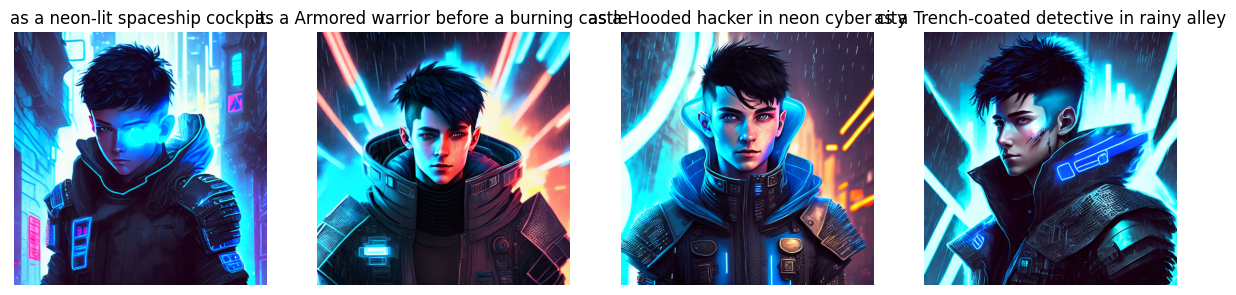

In [17]:
images = [pipe(f"{character} {roles}", generator=generator).images[0] for role in roles]
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
for ax, img, role in zip(axes, images, roles):
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(role)

plt.show()